In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [12]:
df_proyectos = pd.read_csv('../analisis/Proyectos_final.csv')

#Drop Title, ArticleURL columns
df_proyectos.drop(['Title', 'ArticleURL'], axis=1, inplace=True)
df_proyectos.head()

# get list of columns from Cine/TV to 'Enseña la lengua' 
cols = df_proyectos.columns.tolist()
cols = cols[6:19]

origins = ['Iniciativa estatal', 'Organización externa', 'Universidades o institutos', 'Proyectos alternativos desde la comunidad']
translation_dict = {
    'Iniciativa estatal': 'State Initiative',
    'Organización externa': 'External Organization',
    'Universidades o institutos': 'Universities or Institutes',
    'Proyectos alternativos desde la comunidad': 'Alternative Projects from the Community'
}


In [13]:
def get_proyectos_por_anio(df_filtered):
    df_proyectos_anio=df_filtered.copy(deep=True)
    df_proyectos_anio.drop(['Familia', 'Lengua', 'glottocode', 'isocode', 'Hablantes'], axis=1, inplace=True)
    df_proyectos_anio.loc[(df_proyectos['País']=='México') & (df_proyectos['Year']==2016) & (df_proyectos['Radio']==1), 'Proyecto'] = "Radios México"
    df_proyectos_anio.drop_duplicates(inplace=True)
    df_proyectos_anio=df_proyectos_anio.groupby(['Year']).agg({'Proyecto':'count', 'Cine/TV':'sum', 'Redes sociales':'sum', 'Radio':'sum', 'Música':'sum', 'Tecnología':'sum', 'Enseña la lengua':'sum', 'Iniciativa estatal':'sum', 'Organización externa':'sum', 'Universidades o institutos':'sum', 'Proyectos alternativos desde la comunidad':'sum', 'Documentación': 'sum', 'Elaboración de materiales educativos - libros': 'sum', 'Fomenta el uso de la lengua': 'sum'}).reset_index().drop_duplicates()
    return df_proyectos_anio

### Por características

In [ ]:
df_proyectos = df_proyectos.rename(columns={
    'Cine/TV': 'Cinema/TV', 
    'Redes sociales': 'Social Media', 
    'Música': 'Music', 
    'Tecnología': 'Technology', 
    'Enseña la lengua': 'Language Teaching', 
    'Documentación': 'Documentation', 
    'Elaboración de materiales educativos - libros': 'Educational Materials'
})

In [ ]:
df = get_proyectos_por_anio(df_proyectos)
columns = ["Cinema/TV", "Social Media", "Radio", "Music", "Technology", "Language Teaching", "Documentation", "Educational Materials"]

df_melted = df.melt(id_vars='Year', value_vars=columns, var_name='Characteristic', value_name='Number of Projects')

# Create the catplot
g = sns.catplot(x='Number of Projects', y='Year', col='Characteristic', data=df_melted, kind='bar', col_wrap=4, height=4, aspect=1, sharey=True, orient='h', color='#377eb8')

# Set the titles for each subplot
g.set_titles("{col_name}")

# Set the labels for the x and y axes
g.set_axis_labels("", "Year")

# Set the title for the entire plot
g.figure.suptitle('Number of projects by year and characteristic', fontsize=16, y=1.05)

# Loop through the axes and add labels at the end of each bar
# for ax in g.axes.flat:
#     for bar in ax.patches:
#         bar_width = bar.get_width()
#         if bar_width != 0:
#             ax.text(bar_width, bar.get_y() + bar.get_height() / 2, f'{bar_width:.0f}', ha='left', va='center', weight='bold')

plt.savefig('../plots/Number of projects by year and characteristic.png', bbox_inches='tight')
# Show the plot
plt.show()

### a

In [ ]:
df_grouped = pd.read_csv('../analisis/projects_by_country.csv')
df_grouped = df_grouped.sort_values('Proyecto', ascending=False)

In [ ]:
# Define a color for each category using Seaborn's color palette
color_dict = {
    'Iniciativa estatal': sns.color_palette("husl", 4)[0],
    'Organización externa': sns.color_palette("husl", 4)[1],
    'Universidades o institutos': sns.color_palette("husl", 4)[2],
    'Proyectos alternativos desde la comunidad': sns.color_palette("husl", 4)[3]
}

plt.figure(figsize=(15, 6))

# Plot a stacked bar chart with logarithmic values
bars1 = plt.bar(df_grouped['País'], np.log1p(df_grouped['Iniciativa estatal']), color=color_dict['Iniciativa estatal'], width=0.8)
bars2 = plt.bar(df_grouped['País'], np.log1p(df_grouped['Organización externa']), bottom=np.log1p(df_grouped['Iniciativa estatal']), color=color_dict['Organización externa'], width=0.8)
bars3 = plt.bar(df_grouped['País'], np.log1p(df_grouped['Universidades o institutos']), bottom=np.log1p(df_grouped['Iniciativa estatal'] + df_grouped['Organización externa']), color=color_dict['Universidades o institutos'], width=0.8)
bars4 = plt.bar(df_grouped['País'], np.log1p(df_grouped['Proyectos alternativos desde la comunidad']), bottom=np.log1p(df_grouped['Iniciativa estatal'] + df_grouped['Organización externa'] + df_grouped['Universidades o institutos']), color=color_dict['Proyectos alternativos desde la comunidad'], width=0.8)


# add a legend
plt.legend([bars1, bars2, bars3, bars4], ['Iniciativa estatal', 'Organización externa', 'Universidades o institutos', 'Proyectos alternativos desde la comunidad'], loc='upper right')

# add more distance between the bars on the x-axis
plt.xlim(-0.8, len(df_grouped['País'])-0.2)

# the bars are too close to each other, so separate them a bit
plt.xticks(rotation='vertical')
plt.xlabel('Country', fontsize=12, weight='light')
plt.ylabel('Projects (log scale)', fontsize=12, weight='light')
plt.title('Proportion of Projects by Country and Category', fontsize=14, pad=20, weight='light')

plt.savefig('../plots/projects_by_country_category_log.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
columns = ['Iniciativa estatal', 'Organización externa', 'Universidades o institutos', 'Proyectos alternativos desde la comunidad']

# Melt the DataFrame to have one row for each year, country, and category
df_melted = df_grouped.melt(id_vars=['País'], value_vars=columns, var_name='Category', value_name='Number of Projects')

# Create the catplot
g = sns.catplot(x='Number of Projects', y='País', col='Category', data=df_melted, kind='bar', col_wrap=4, height=4, aspect=1, sharey=True, orient='h', color='#377eb8')

# Set the titles for each subplot
g.set_titles("{col_name}")

# Set the labels for the x and y axes
g.set_axis_labels("", "Country")
# Set the title for the entire plot
g.fig.suptitle('Number of projects by country and origin', fontsize=16, y=1.05)

# Save the figure
plt.savefig('../plots/Number of projects by country and origin.png', bbox_inches='tight')

# Show the plot
plt.show()

### Proportion over time

In [14]:
df_proyectos_por_anio=get_proyectos_por_anio(df_proyectos)
df_proyectos_por_anio.set_index('Year', inplace=True)
df_proyectos_por_anio = df_proyectos_por_anio[origins]


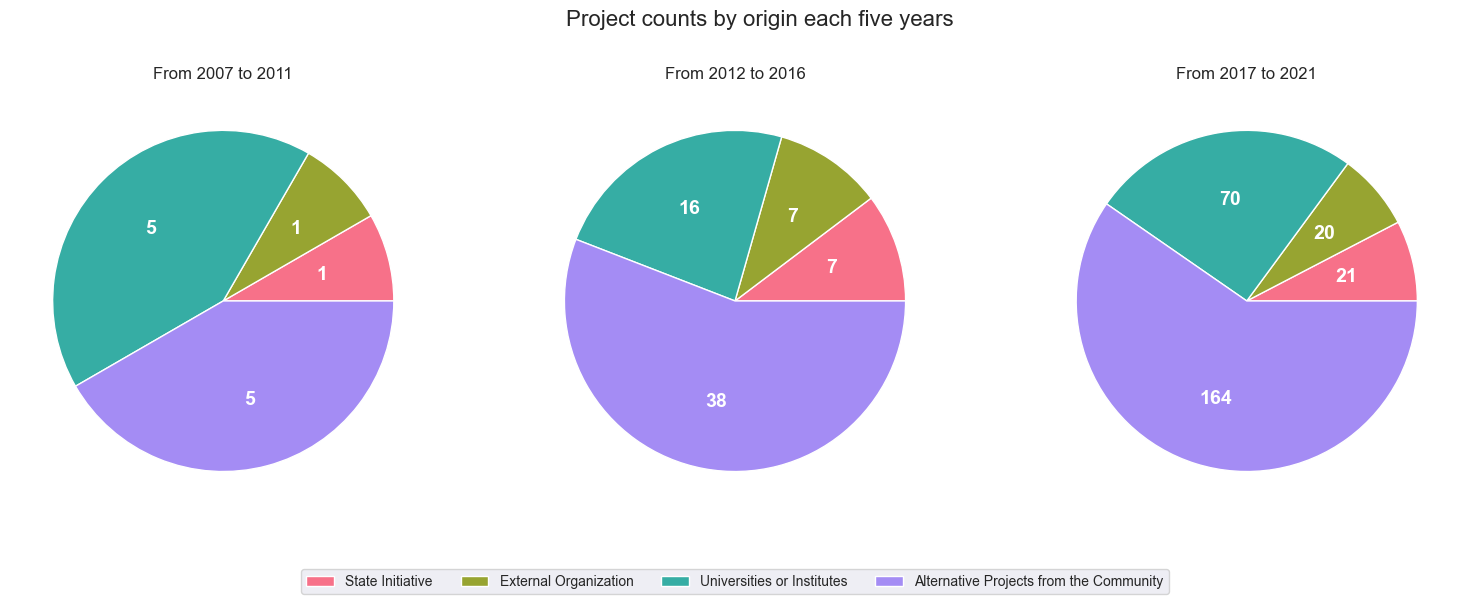

In [19]:
# Now, I want 3 pie charts, one each 5 years, showing the distribution of the projects by origin
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Project counts by origin each five years', fontsize=16)

# Define the color palette
colors = sns.color_palette("husl", 4)

for i, ax in enumerate(axs.flat):
    start = 2007+(i)*5
    end = start+5
    # Get the sum of projects by origin for the given period
    data = df_proyectos_por_anio.loc[start:end-1].sum()
    # Create the pie chart
    patches, texts, autotexts = ax.pie(data, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), colors=colors, textprops={'color':"w", 'weight':'bold', 'fontsize':14})
    # Set the title for the subplot
    ax.set_title(f'From {start} to {end-1}')

# Create the legend
fig.legend(patches, data.index, loc="lower center", ncol=4)
#Translate the legend
for t in fig.legends[0].texts:
    t.set_text(translation_dict[t.get_text()])
plt.subplots_adjust(right=0.85)  # Adjust the right padding to make room for the legend

plt.show()